In [ ]:
install.packages('data.table')
install.packages('R.utils')
install.packages('bit64')
install.packages('leaflet')
install.packages('magrittr')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘png’, ‘raster’, ‘sp’, ‘viridis’, ‘leaflet.providers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(data.table)
library(dplyr)
library(ggplot2)
library(R.utils)
library(bit64)
library(repr)
library(leaflet)
library(stringr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp




In [ ]:
calendar <- fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/data/calendar.csv.gz", encoding = 'UTF-8')
head(calendar,20)

listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
<int>,<date>,<chr>,<chr>,<chr>,<int>,<int>
2577,2020-10-19,f,$125.00,$125.00,3,1125
73533,2020-10-20,t,$95.00,$95.00,2,1125
73533,2020-10-21,t,$95.00,$95.00,2,1125
73533,2020-10-22,t,$95.00,$95.00,2,1125
73533,2020-10-23,t,$95.00,$95.00,2,1125
73533,2020-10-24,t,$95.00,$95.00,2,1125
73533,2020-10-25,t,$95.00,$95.00,2,1125
73533,2020-10-26,t,$95.00,$95.00,2,1125
73533,2020-10-27,t,$95.00,$95.00,2,1125


In [ ]:
listings <- fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/data/listings.csv.gz", encoding = 'UTF-8')

head(listings)

id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,⋯,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
<int>,<chr>,<int64>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>
2577,https://www.airbnb.com/rooms/2577,20201012032825,2020-10-19,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, open modern kitchen, cable tv, wifi, sleeping space up to 5 people, Republique area, 5 minutes from the St Martin Canal, Marais area, 10 min from Chatelet and the Louvre.<br /><br /><b>The space</b><br />The district has any service or shop you may desire at a walking distance, many restaurants and clubs as well. <br />I will be pleased to suggest our best addresses and give you directions to have a very enjoyable journey. <br />We have 1 separated bedroom and one mezzanine for the second bed. One bathroom is """"en suite"""" to the main bedroom. <br />Welcome to our beautiful loft!<br />Karine",,https://a0.muscache.com/pictures/09da057c-0120-4d5c-b464-d95c75921dde.jpg,2827,https://www.airbnb.com/users/show/2827,⋯,10,10,10,,t,1,1,0,0,0.05
3109,https://www.airbnb.com/rooms/3109,20201012032825,2020-10-18,zen and calm,<b>The space</b><br />I bedroom appartment in Paris 14,Good restaurants<br />very close the Montparnasse Station<br />15 m from the center of Paris,https://a0.muscache.com/pictures/baeae9e2-cd53-4ac3-b1bc-4055c0bb2e77.jpg,3631,https://www.airbnb.com/users/show/3631,⋯,10,10,10,,f,1,1,0,0,0.19
4886,https://www.airbnb.com/rooms/4886,20201012032825,2020-10-18,Country-Style Studio Hip Area FREE CRUISE & WIFI,"Bright and Cozy Studio Apartment for 2 Guests. Enjoy Great Authentic and Central Location near Canal St Martin and Republique. Historic Building with Elevator. <br />Outdoor Market a block away. Steps to Trendy Rue Oberkampf & Hip Canal St Martin. Minutes to the Marais District or Bastille. 2 Free Ricer Cruise Tix !<br /><br /><b>The space</b><br />2 Free River Cruise Tix with your booking ! Mention this offer with your booking. <br /><br />Studio la Fontaine is a well-equipped country-style 15 sq. meter studio apartment that has a warm and cozy feel. It can sleep up to 2 guests.<br /><br />Located in one of the most loved neighborhoods by hip Parisians and those in the know. <br />Trendy area with many funky shops, well-regarded restaurants and innovative art galleries.<br /><br />Fully furnished and stylishly decorated, this apartment is located in a historic building built in the 18th century with elevator.<br /><br />Located on a very pretty square, your window looks out over t","2 Free River Cruise Tix with your booking ! Mention this offer with your booking.<br /><br />Located on lively Rue Jean Pierre Timbaud in the same building as the famous restaurant """"Astier"""". The street has many authentic restaurants, markets, cafes and bistros to choose from.<br /><br />Located in the 11th Arrondissement (district) on the border of the 3rd, which is the beautiful and fashionable Marais neighborhood.<br />You will be walking distance to all the shopping, cafes, restaurants and museums that"""" Le Marais"""" has to offer.<br /><br />The Canal St Martin is only three minutes away and it is a shady and cool place to relax on a hot summer day with a book and a baguette. Made famous in the movie Amelie, you can see where she skipped stones across the water to relax.<br /><br />You are a 30 minute walk from Notre Dame Cathedral, Isle Saint Louis, the Louvre and the entire heart of Paris. Or take the metro and be there within 10 minutes.",https://a0.muscache.com/pictures/395578/e7f46d40_original.jpg,6792,https://www.airbnb.com/users/show/6792,⋯,9,10,9,7511101570436,f,11,11,0,0,0

# Je crée à nouveau des datasets de la partie 1 que nous utiliserons plus tard  lors de ces études quand nous joindrons les tables
  

In [ ]:
#duplicons le dataset
listings1 <- listings

In [ ]:
listings1$room_type<-as.factor(listings1$room_type)
summary(listings1$room_type)

Entire home/apt      Hotel room    Private room     Shared room 
          57184            1382            7359             409

In [ ]:
listings1$property_type  <-  case_when(
  grepl("apartment", listings1$property_type) | grepl("apt", listings1$property_type)  ~ "Appartement",
   grepl("townhouse", listings1$property_type) | grepl("Townhouse", listings1$property_type) ~ "Townhouse",
    grepl("house", listings1$property_type) | grepl("place", listings1$property_type) ~ "House",
     grepl("bed and breakfast", listings1$property_type)  ~ "Bed and breakfast",
     grepl("loft", listings1$property_type) | grepl("Loft", listings1$property_type)  ~ "Loft",
     grepl("condominium", listings1$property_type) | grepl("Condominium", listings1$property_type) ~ "condominium",
     grepl("boat", listings1$property_type) ~ "Boat",
     grepl("guest suite", listings1$property_type)| grepl("floor", listings1$property_type) ~ "Guest suite",
     grepl("hostel", listings1$property_type) | grepl("hotel", listings1$property_type)  ~ "Hotel",
     
     FALSE ~ "Autre"
)

In [ ]:
#transformation de la variable property_type en factor
listings1$property_type <- as.factor(listings1$property_type)

In [ ]:
table(listings1$property_type)


      Appartement Bed and breakfast              Boat       condominium 
            59566               167                 9              2082 
      Guest suite             Hotel             House              Loft 
               44              2236               658              1241 
        Townhouse 
              244 

In [ ]:
colnames(listings1)

[1] "id"                                          
 [2] "listing_url"                                 
 [3] "scrape_id"                                   
 [4] "last_scraped"                                
 [5] "name"                                        
 [6] "description"                                 
 [7] "neighborhood_overview"                       
 [8] "picture_url"                                 
 [9] "host_id"                                     
[10] "host_url"                                    
[11] "host_name"                                   
[12] "host_since"                                  
[13] "host_location"                               
[14] "host_about"                                  
[15] "host_response_time"                          
[16] "host_response_rate"                          
[17] "host_acceptance_rate"                        
[18] "host_is_superhost"                           
[19] "host_thumbnail_url"                          
[20] "host_picture_url"                            
[21] "host_neighbourhood"                          
[22] "host_listings_count"                         
[23] "host_total_listings_count"                   
[24] "host_verifications"                          
[25] "host_has_profile_pic"                        
[26] "host_identity_verified"                      
[27] "neighbourhood"                               
[28] "neighbourhood_cleansed"                      
[29] "neighbourhood_group_cleansed"                
[30] "latitude"                                    
[31] "longitude"                                   
[32] "property_type"                               
[33] "room_type"                                   
[34] "accommodates"                                
[35] "bathrooms"                                   
[36] "bathrooms_text"                              
[37] "bedrooms"                                    
[38] "beds"                                        
[39] "amenities"                                   
[40] "price"                                       
[41] "minimum_nights"                              
[42] "maximum_nights"                              
[43] "minimum_minimum_nights"                      
[44] "maximum_minimum_nights"                      
[45] "minimum_maximum_nights"                      
[46] "maximum_maximum_nights"                      
[47] "minimum_nights_avg_ntm"                      
[48] "maximum_nights_avg_ntm"                      
[49] "calendar_updated"                            
[50] "has_availability"                            
[51] "availability_30"                             
[52] "availability_60"                             
[53] "availability_90"                             
[54] "availability_365"                            
[55] "calendar_last_scraped"                       
[56] "number_of_reviews"                           
[57] "number_of_reviews_ltm"                       
[58] "number_of_reviews_l30d"                      
[59] "first_review"                                
[60] "last_review"                                 
[61] "review_scores_rating"                        
[62] "review_scores_accuracy"                      
[63] "review_scores_cleanliness"                   
[64] "review_scores_checkin"                       
[65] "review_scores_communication"                 
[66] "review_scores_location"                      
[67] "review_scores_value"                         
[68] "license"                                     
[69] "instant_bookable"                            
[70] "calculated_host_listings_count"              
[71] "calculated_host_listings_count_entire_homes" 
[72] "calculated_host_listings_count_private_rooms"
[73] "calculated_host_listings_count_shared_rooms" 
[74] "reviews_per_month"

In [ ]:

listings1$price_dollar <-  str_extract(listings1$price, "\\d+") %>% unlist() %>% as.numeric() 
summary(listings1$price_dollar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    59.0    80.0   104.5   118.0   999.0 

# Etude 7

### Numer of listings available by date


In [ ]:
 #Création du dataset
 available_listings <- calendar %>% filter(available=="t" & date>= "2020-12-01" ) %>% group_by(date) %>% summarise(nombre_de_listing= length(listing_id))
 head( available_listings, 20)

`summarise()` ungrouping output (override with `.groups` argument)



date,nombre_de_listing
<date>,<int>
2020-12-01,21147
2020-12-02,21147
2020-12-03,21159
2020-12-04,21256
2020-12-05,21185
2020-12-06,21286
2020-12-07,21216
2020-12-08,21244
2020-12-09,21270


#### Représentation graphique

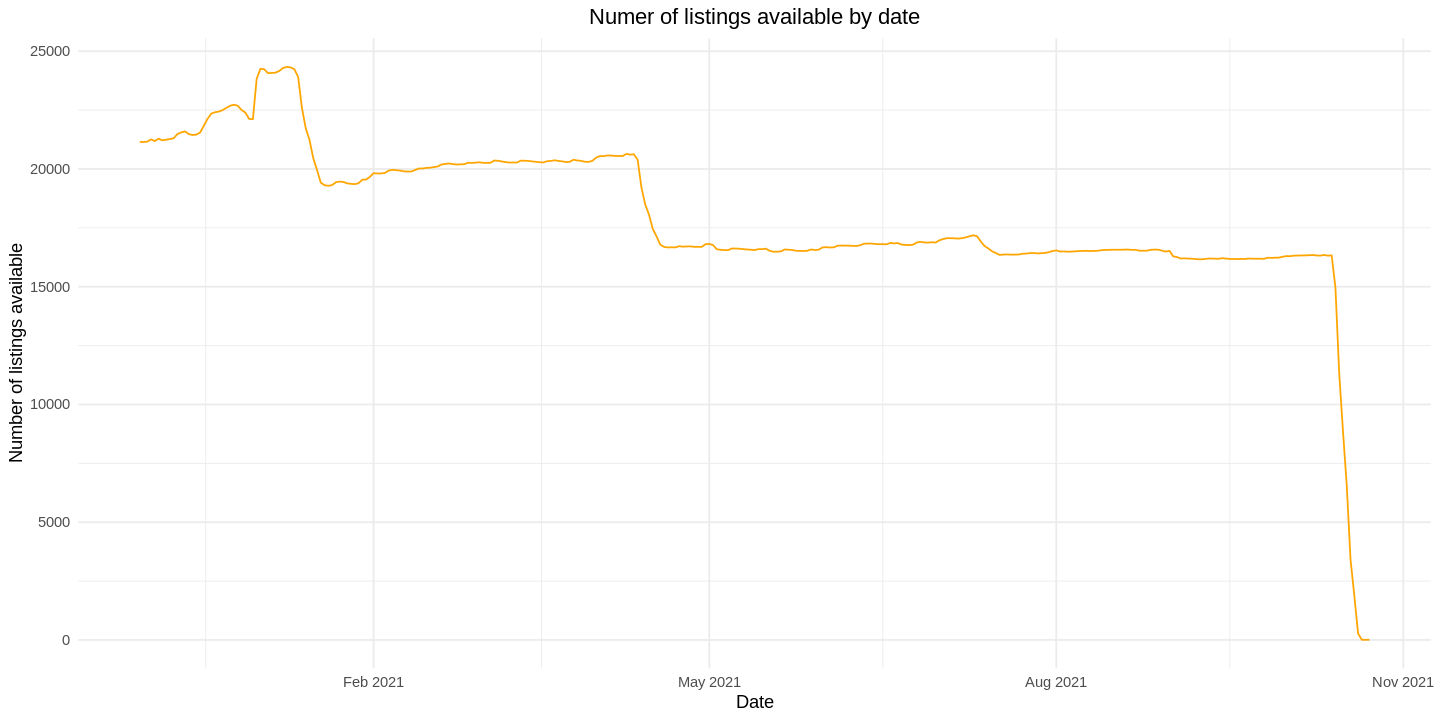

In [ ]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot( available_listings, aes(x=date, y=nombre_de_listing )) + geom_line(colour= "orange" ) +
 ggtitle("Numer of listings available by date")    + theme_minimal() +
  ylab("Number of listings available") + xlab("Date") +
  theme(plot.title = element_text(hjust = 0.5)) + scale_x_date(date_breaks = "3 months", date_labels = "%b %Y")

# Etude 8
Average price of 2 person Accommodation by date

In [ ]:
calendar1 <- calendar

In [ ]:
 #on renome la colonne listing_id en id pour avoir un élément fiable de jointure
 calendar1 <- calendar1 %>% rename(id = listing_id )
head(calendar1)

id,date,available,price,adjusted_price,minimum_nights,maximum_nights
<int>,<date>,<chr>,<chr>,<chr>,<int>,<int>
2577,2020-10-19,f,$125.00,$125.00,3,1125
73533,2020-10-20,t,$95.00,$95.00,2,1125
73533,2020-10-21,t,$95.00,$95.00,2,1125
73533,2020-10-22,t,$95.00,$95.00,2,1125
73533,2020-10-23,t,$95.00,$95.00,2,1125
73533,2020-10-24,t,$95.00,$95.00,2,1125


In [ ]:

colnames(calendar1)

[1] "id"             "date"           "available"      "price"         
[5] "adjusted_price" "minimum_nights" "maximum_nights"

Créons un dataset regroupant les variables issues du dataset listings qui nous seront utiles pour cette étude

In [ ]:
Shortlistings <- listings1 %>% mutate(price_euro = price_dollar * 0.82) %>% select(price, price_euro,  price_dollar, id, accommodates)
head(Shortlistings)

price,price_euro,price_dollar,id,accommodates
<chr>,<dbl>,<dbl>,<int>,<int>
$125.00,102.50,125,2577,4
$60.00,49.20,60,3109,2
$89.00,72.98,89,4886,2
$103.00,84.46,103,4890,4
$48.00,39.36,48,5396,2
$94.29,77.08,94,7397,4


In [ ]:
#Jointure de tables Shortlistings et calendar1
data_united <- inner_join(calendar1, Shortlistings, by= "id")
head(data_united, 10)

id,date,available,price.x,adjusted_price,minimum_nights,maximum_nights,price.y,price_euro,price_dollar,accommodates
<int>,<date>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>
2577,2020-10-19,f,$125.00,$125.00,3,1125,$125.00,102.5,125,4
73533,2020-10-20,t,$95.00,$95.00,2,1125,$95.00,77.9,95,3
73533,2020-10-21,t,$95.00,$95.00,2,1125,$95.00,77.9,95,3
73533,2020-10-22,t,$95.00,$95.00,2,1125,$95.00,77.9,95,3
73533,2020-10-23,t,$95.00,$95.00,2,1125,$95.00,77.9,95,3
73533,2020-10-24,t,$95.00,$95.00,2,1125,$95.00,77.9,95,3
73533,2020-10-25,t,$95.00,$95.00,2,1125,$95.00,77.9,95,3
73533,2020-10-26,t,$95.00,$95.00,2,1125,$95.00,77.9,95,3
73533,2020-10-27,t,$95.00,$95.00,2,1125,$95.00,77.9,95,3


In [ ]:
data_average_acc <- data_united %>% filter(accommodates== 2) %>% group_by(date) %>% summarise(average_price= mean(price_euro)) 
head(data_average_acc)

`summarise()` ungrouping output (override with `.groups` argument)



date,average_price
<date>,<dbl>
2020-10-12,59.08853
2020-10-13,54.83879
2020-10-14,57.22879
2020-10-15,61.63277
2020-10-16,63.06508
2020-10-17,63.52614


Représentation Graphique du prix moyen des listings de 2 personnes par date

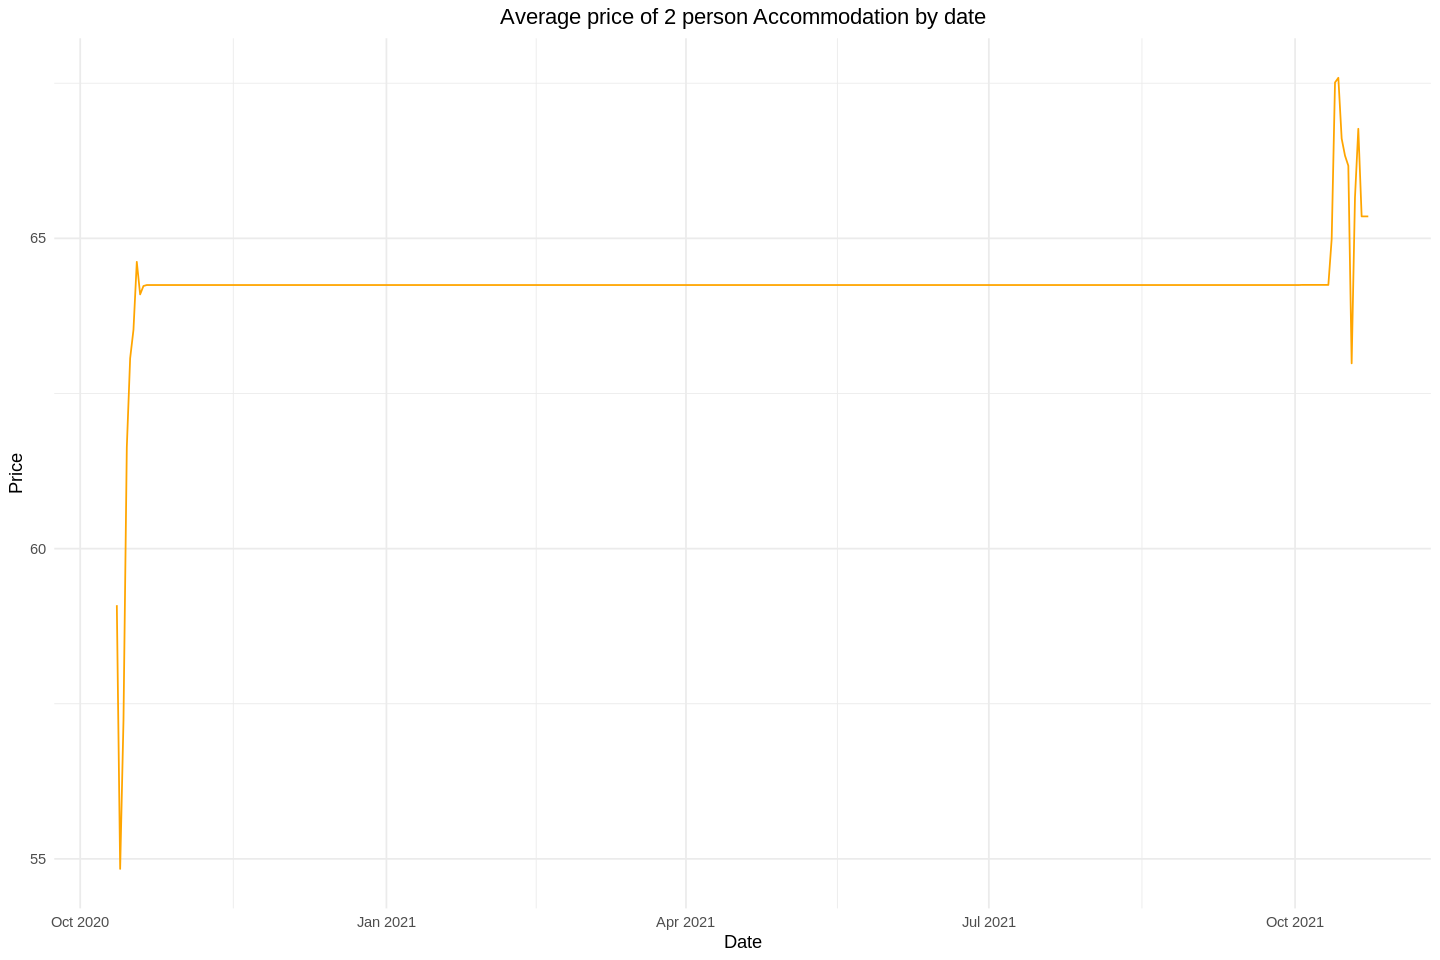

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(data_average_acc, aes(x=date, y= average_price )) + geom_line(colour= "orange" ) +
 ggtitle("Average price of 2 person Accommodation by date")    + theme_minimal() +
  ylab("Price") + xlab("Date") +
  theme(plot.title = element_text(hjust = 0.5)) 

# Etude complementaire 
Représentation Graphique du prix moyen des listings de 4 personnes par date

In [ ]:
data_average_acc4 <- data_united %>% filter(accommodates== 4) %>% group_by(date) %>% summarise(average_price= mean(price_euro)) 
head(data_average_acc4)

`summarise()` ungrouping output (override with `.groups` argument)



date,average_price
<date>,<dbl>
2020-10-12,87.89003
2020-10-13,81.71464
2020-10-14,86.16993
2020-10-15,92.57564
2020-10-16,95.54713
2020-10-17,95.95204


Représentation Graphique du prix moyen des listings de 4 personnes par date

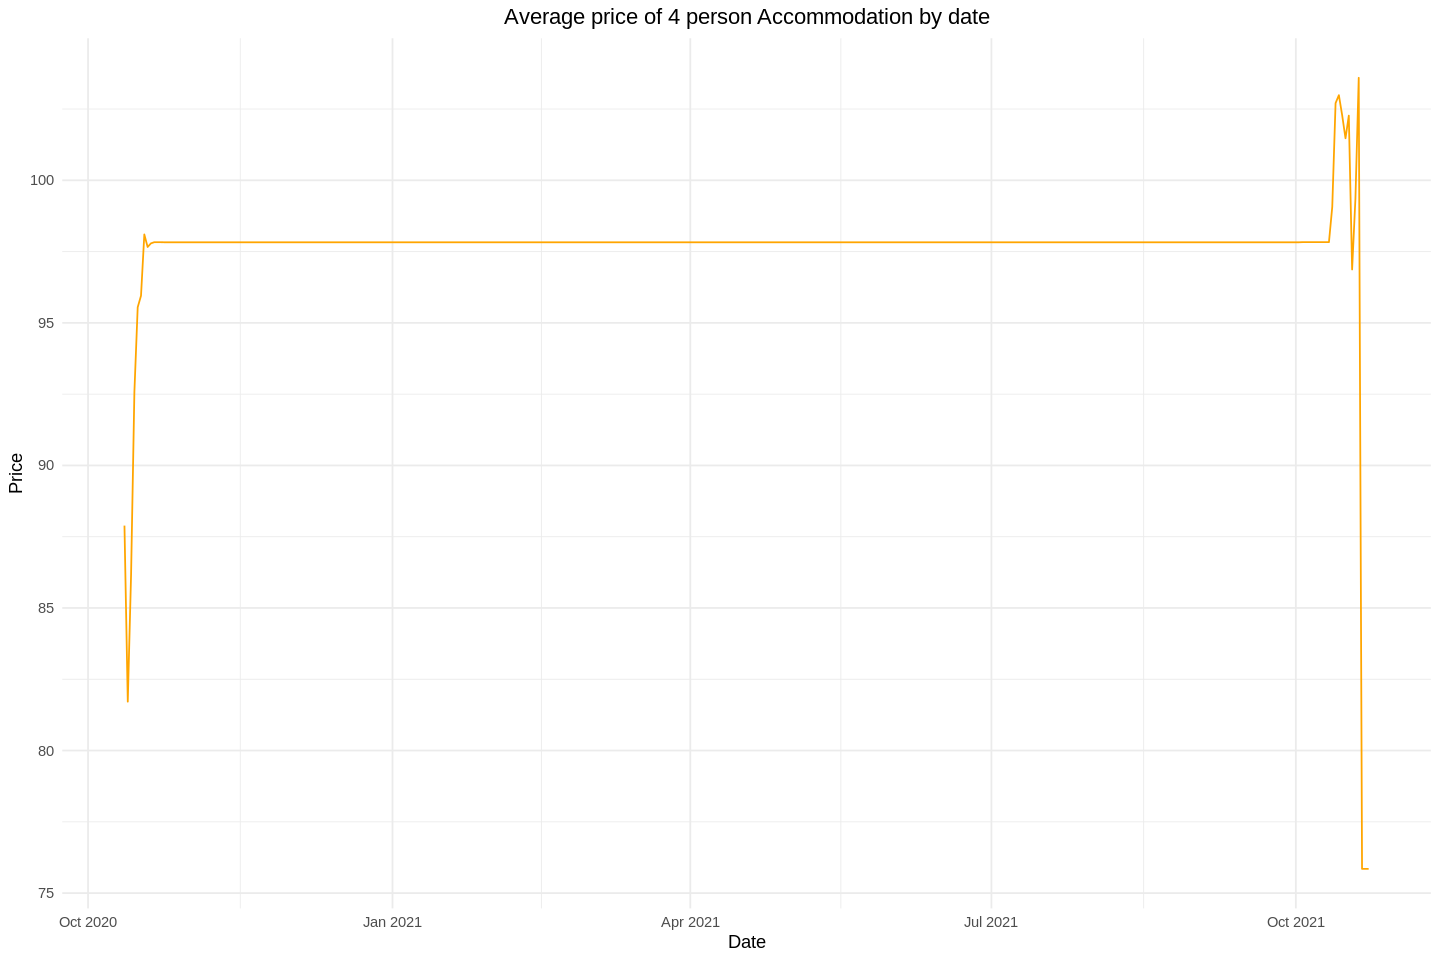

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(data_average_acc4, aes(x=date, y= average_price )) + geom_line(colour= "orange" ) +
 ggtitle("Average price of 4 person Accommodation by date")    + theme_minimal() +
  ylab("Price") + xlab("Date") +
  theme(plot.title = element_text(hjust = 0.5)) 